# Word Cloud

In [1]:
import re
import string
import nltk

### uploading file into 'text' variable

any text can be uploaded

In [2]:
with open("congo_article.txt", encoding='utf8') as my_file:
    text = my_file.read()
    
text[:500]

'EXPLAINING CONFLICTS IN DR CONGO\nFROM INFRASTRUCTURE PERSPECTIVE\n© 2019 E. KIRILLOV\nFor more than twenty years the Democratic Republic of Congo has been experiencing bloody conflicts which have resulted in\nmillions of deaths. The intervention of international community had a limited success and violence continues to date. Despite\nabundance of academic literature related to the theme, there are very few papers which employ quantitative research to explain this\nviolence. Furthermore, there has not'

In [3]:
# Dune text

# with open("Dune.txt", encoding='utf8') as my_file:
#     text = my_file.read()
    
# text[:500]

In [4]:
# Bible text

# text_ = nltk.corpus.gutenberg.words('bible-kjv.txt')
# text = ''
# for _ in text_:
#     text += _ + ' '

# text[:500]

### cleaning text

In [5]:
def clean_text(text):
    '''
    очистка текста
    на выходе очищеный текст
    '''
    
    if not isinstance(text, str):
        text = str(text)
    
    text = text.lower()
    text = text.strip('\n').strip('\r').strip('\t')
    text = re.sub("-\s\r\n\|-\s\r\n|\r\n", '', str(text))

    text = re.sub("[0-9]|[-—.,:;_%©«»?*!@#№$^‘’`●•·&()]|[+=]|[[]|[]]|[/]|", '', text)
    text = re.sub(r"\r\n\t|\n|\\s|\r\t|\\n", ' ', text)
    text = re.sub(r'[\xad]|[\s+]', ' ', text.strip())
    
    return text

In [6]:
def remove_non_ascii_2(string):
    return string.encode('ascii', errors='ignore').decode()

In [7]:
text = clean_text(text)
text = remove_non_ascii_2(text)
text[:500]

C:\Users\fross\AppData\Local\Temp/ipykernel_3116/3306722136.py:14: FutureWarning: Possible nested set at position 43
  text = re.sub("[0-9]|[-—.,:;_%©«»?*!@#№$^‘’`●•·&()]|[+=]|[[]|[]]|[/]|", '', text)


'explaining conflicts in dr congo from infrastructure perspective   e kirillov for more than twenty years the democratic republic of congo has been experiencing bloody conflicts which have resulted in millions of deaths the intervention of international community had a limited success and violence continues to date despite abundance of academic literature related to the theme there are very few papers which employ quantitative research to explain this violence furthermore there has not been any r'

### tokenization and lemmatization

In [8]:
# from nltk.tokenize import word_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
# from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer

In [9]:
tokenized_text = word_tokenize(text)

word_lem = WordNetLemmatizer()
stopwords_en = stopwords.words('english')
lemmatized_text = [word_lem.lemmatize(_) for _ in tokenized_text if _ not in stopwords_en and len(_) > 1]

lemmatized_text[:10]

['explaining',
 'conflict',
 'dr',
 'congo',
 'infrastructure',
 'perspective',
 'kirillov',
 'twenty',
 'year',
 'democratic']

### forming string again out of nouns and adjectives only

In [10]:
from nltk import word_tokenize, pos_tag


# def nouns(text):
#     '''Given a string of text, tokenize the text and pull out only the nouns.'''
#     is_noun = lambda pos: pos[:2] == 'NN'
#     tokenized = word_tokenize(text)
#     all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
#     return ' '.join(all_nouns)

def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [11]:
text = ''
for _ in lemmatized_text:
    text += _ + ' '

text = nouns_adj(text)

In [12]:
from wordcloud import WordCloud


wc = WordCloud(stopwords=stopwords_en, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [13]:
import matplotlib.pyplot as plt

In [14]:
# %matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [15]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


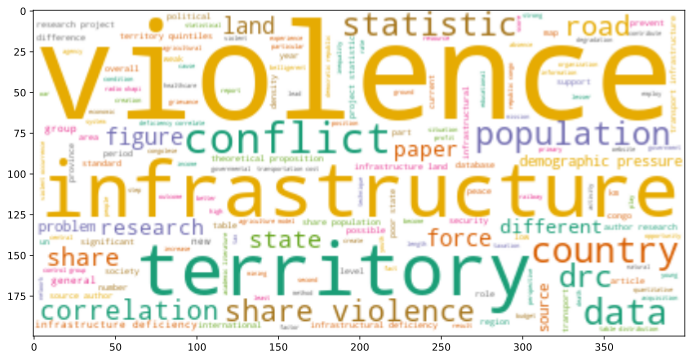

In [16]:
plt.style.use('seaborn-bright')
plt.rcParams['figure.figsize'] = [16, 6]
wc.generate(text)
plt.imshow(wc, interpolation="bilinear")
    
plt.show()

# Sentiment Analysis

In [17]:
from textblob import TextBlob

In [20]:
TextBlob(text).sentiment

Sentiment(polarity=-0.015747960538797182, subjectivity=0.45075145306220976)